In [3]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
from keras import layers,Model,losses,regularizers,models


import tensorflow as tf

import numpy as np
import imutils
import cv2
from matplotlib import pyplot as plt

import datetime
import tensorflow as tf
from vit_keras import vit
from tensorflow import keras


print(tf.__version__)
# Explicitly specify GPU device
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(len(physical_devices))

2.10.0
1


In [5]:
# ResNet binary (task 1, 3)


base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in base_model.layers:
  layer.trainable = False


head_model = models.Sequential([
    base_model,
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming multi class classification, adjust output units for your task
])

head_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
head_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 64)          1179712   
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                51232     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 24,818,689
Trainable params: 1,230,977
Non-trainable params: 23,587,712
_________________________________________________________________


In [5]:
# ResNet more categories

input_layer = layers.Input(shape=(224,224,3), dtype=tf.float16)  # Example: float16 data type

base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in base_model.layers:
  layer.trainable = False

  head_model_2 = tf.keras.Sequential([
    base_model,
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming multi class classification, adjust output units for your task
    ])
        

        
head_model_2.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

head_model_2.summary()

Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_175 (Conv2D)         (None, 5, 5, 64)          1179712   
                                                                 
 flatten_175 (Flatten)       (None, 1600)              0         
                                                                 
 dense_350 (Dense)           (None, 32)                51232     
                                                                 
 dense_351 (Dense)           (None, 3)                 99        
                                                                 
Total params: 24,818,755
Trainable params: 1,231,043
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
# ViT binary (task 1, 3)

base_model = vit.vit_b16(
        image_size=224,
        weights="imagenet21k+imagenet2012",
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=2
    )

for i,layer in enumerate(base_model.layers):
  print(layer.name)
  layer.trainable = False
    
  
vit_model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, 'relu'),
        tf.keras.layers.Reshape((10,10,3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, 'relu'),
        tf.keras.layers.Dense(1, 'sigmoid')
    ])

vit_model.summary()

c:\Users\MTDML_WS-3\anaconda3\envs\test_env\lib\site-packages\vit_keras\utils.py:83: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  UserWarning,


input_4
embedding
reshape
class_token
Transformer/posembed_input
Transformer/encoderblock_0
Transformer/encoderblock_1
Transformer/encoderblock_2
Transformer/encoderblock_3
Transformer/encoderblock_4
Transformer/encoderblock_5
Transformer/encoderblock_6
Transformer/encoderblock_7
Transformer/encoderblock_8
Transformer/encoderblock_9
Transformer/encoderblock_10
Transformer/encoderblock_11
Transformer/encoder_norm
ExtractToken
Model: "sequential_176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 flatten_176 (Flatten)       (None, 768)               0         
                                                                 
 dense_352 (Dense)           (None, 300)               230700    
                                                                 
 reshape_1 (Reshape

In [7]:
base_model = vit.vit_b16(
        image_size=224,
        weights="imagenet21k+imagenet2012",
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=3
    )

for i,layer in enumerate(base_model.layers):
  print(layer.name)
  layer.trainable = False
    
  
vit_model_2 = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, 'relu'),
        tf.keras.layers.Reshape((10,10,3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, 'relu'),
        tf.keras.layers.Dense(3, 'softmax')
    ])

vit_model_2.summary()

input_5
embedding
reshape_2
class_token
Transformer/posembed_input
Transformer/encoderblock_0
Transformer/encoderblock_1
Transformer/encoderblock_2
Transformer/encoderblock_3
Transformer/encoderblock_4
Transformer/encoderblock_5
Transformer/encoderblock_6
Transformer/encoderblock_7
Transformer/encoderblock_8
Transformer/encoderblock_9
Transformer/encoderblock_10
Transformer/encoderblock_11
Transformer/encoder_norm
ExtractToken
Model: "sequential_177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 flatten_178 (Flatten)       (None, 768)               0         
                                                                 
 dense_355 (Dense)           (None, 300)               230700    
                                                                 
 reshape_3 (Resha

In [14]:
head_model.load_weights('weights_ResNet_Task_2_binary_B128_E100.h5')

In [24]:
head_model_2.load_weights('weights_ResNet_Task_2_B128_E100.h5')

In [6]:
head_model.load_weights('weights_ResNet_Task_3_B128_E100.h5')

In [8]:
vit_model.load_weights('weights_ViT_Task_2_binary_B128_E100.h5')

In [9]:
vit_model_2.load_weights('weights_ViT_Task_2_B128_E100.h5')

In [113]:
vit_model.load_weights('weights_ViT_Task_3_B128_E100.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'weights_ViT_Task_3_B128_E100.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [9]:
preds=[]
for file in Jasper_bad_imp:
    orig = cv2.imread(folder_path+"/"+file)
    orig = (orig/255).astype(np.float64)
    image = np.expand_dims(orig, axis=0)
    preds.append(head_model.predict(image))
    
average = sum(preds) / len(preds)
    
print(average)

1/1 [==============================] - 0s 24ms/step
[[0.86620283]]


In [36]:
print(preds)

[array([[0.3362762 , 0.2891146 , 0.37460917]], dtype=float32), array([[0.35817316, 0.2521419 , 0.38968498]], dtype=float32), array([[0.35877475, 0.30959922, 0.331626  ]], dtype=float32), array([[0.3306847 , 0.29190585, 0.37740946]], dtype=float32), array([[0.31321937, 0.24119003, 0.44559062]], dtype=float32), array([[0.38109583, 0.28596276, 0.3329414 ]], dtype=float32), array([[0.34703824, 0.25859615, 0.39436564]], dtype=float32), array([[0.31961823, 0.2569813 , 0.42340046]], dtype=float32), array([[0.36613572, 0.25929335, 0.37457097]], dtype=float32), array([[0.32299525, 0.24522732, 0.43177742]], dtype=float32), array([[0.36521134, 0.29124957, 0.34353915]], dtype=float32), array([[0.39206636, 0.28859434, 0.31933925]], dtype=float32), array([[0.35211098, 0.24791233, 0.3999767 ]], dtype=float32), array([[0.37586394, 0.2916481 , 0.33248797]], dtype=float32), array([[0.36563504, 0.27363902, 0.36072594]], dtype=float32), array([[0.35913607, 0.2816673 , 0.35919663]], dtype=float32), array([

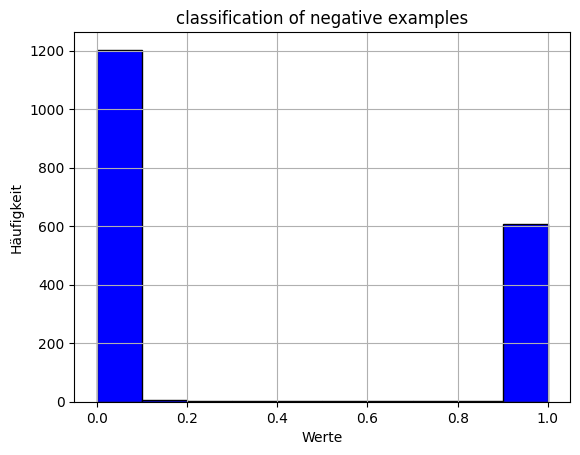

In [9]:
import matplotlib.pyplot as plt

test_data = "classification of negative examples"

def plot_histogram(data, bins=10):
    plt.hist(data, bins=bins, color='blue', edgecolor='black')
    plt.xlabel('Werte')
    plt.ylabel('Häufigkeit')
    plt.title(test_data)
    plt.grid(True)
    plt.show()
    

number_list = [arr.item() for arr in preds]
plot_histogram(number_list)

In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [ ]:
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(vit_model, 0, "conv2d")

In [ ]:
displayed_images = []
folder_path = "cam tests"

preds=[]
for file in Jasper_good_imp[:10]:
    orig = cv2.imread(folder_path+"/"+file)
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

    #orig=file
    image = np.expand_dims(orig, axis=0)
    image = (image/255).astype(np.float64)

    
    heatmap = cam.compute_heatmap(image)
    print(vit_model.predict(image))
    preds.append(vit_model.predict(image))
    # resize the resulting heatmap to the original input image dimensions
    # and then overlay heatmap on top of the image
    heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
    (heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
    #plt.imshow(output)
    displayed_images.append(output[:,:,::-1])
    
for file in displayed_images:
    plt.imshow(file)
    plt.show()
    
    
average = sum(preds) / len(preds)

print("Average:", average)